In [1]:
import pandas as pd
import numpy as np
import keras
import sklearn
from sklearn.neural_network import MLPClassifier
import olac
import time
import multiprocessing.dummy as mp

from olac.pipeline import *
from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15, 10]

%matplotlib inline
%reload_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [16]:
# -- pipeline

demomodel = MLPClassifier((63,32,8))
# demomodel = sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier(C=0.1)
# demodata = olac.data_generators.delayed_generator(
#     olac.data_generators.generator_from_csv('test.csv', ['x1','x2'], 'label'), 0.01)
demodata = olac.data_generators.delayed_generator(olac.data_generators.cluster_generator(n_points=5000), 0.01)
demopredictor = olac.pipeline.OnlinePredictor(verbose=False)
demolabeller = olac.pipeline.ThresholdLabeller(threshold=20, prob=0.5, verbose=False)

demopipeline = olac.pipeline.DemoPipeline(data_generator=demodata, model=demomodel, predictor=demopredictor, labeller=demolabeller)

In [17]:
val_set, train_set = demopipeline.demo(mode='plot', describe=False, sleep=2);
# demopipeline.run()

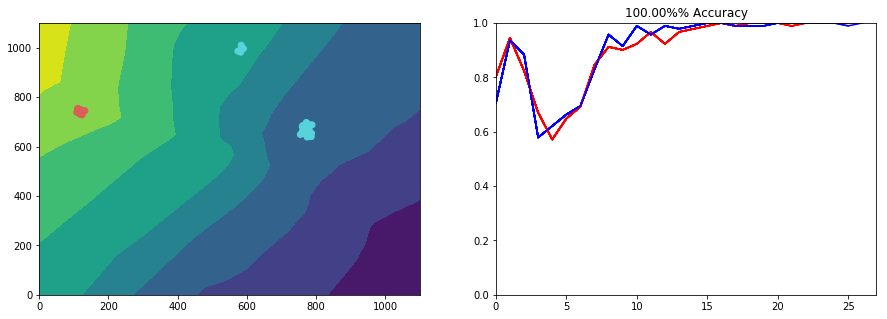

In [19]:
demopipeline.replay(x_min=0, x_max=1100, val_set=val_set, train_set=train_set)